Fit simple linear regression
Age -> Salary

Multiple Linear regiression
Age, YOE -> Salary

Encode categorical variable


training/ testing
Assumptions
Evaluation

In [2]:
import pandas as pd
# Load the data
data = pd.read_csv('../data/Salary_Data.csv')

In [3]:
print(data.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
data['Age']
# data frame

0       32.0
1       28.0
2       45.0
3       36.0
4       52.0
        ... 
6699    49.0
6700    32.0
6701    30.0
6702    46.0
6703    26.0
Name: Age, Length: 6704, dtype: float64

In [6]:
data[['Age']]
# gives data frame

,Age
0,32.0
1,28.0
2,45.0
3,36.0
4,52.0
...,...
6699,49.0
6700,32.0
6701,30.0
6702,46.0


In [7]:
data.Age
# series, single columns

0       32.0
1       28.0
2       45.0
3       36.0
4       52.0
        ... 
6699    49.0
6700    32.0
6701    30.0
6702    46.0
6703    26.0
Name: Age, Length: 6704, dtype: float64

In [8]:
# check null values
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [9]:
# drop the null values
data.dropna(inplace=True)

In [10]:
#  now check if there are null values
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [11]:
x = data[['Age']] # for independent variable create data frame
y = data.Salary

print(x.head())
print(y.head)

    Age
0  32.0
1  28.0
2  45.0
3  36.0
4  52.0
<bound method NDFrame.head of 0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6698, dtype: float64>


<Axes: xlabel='Age', ylabel='Salary'>

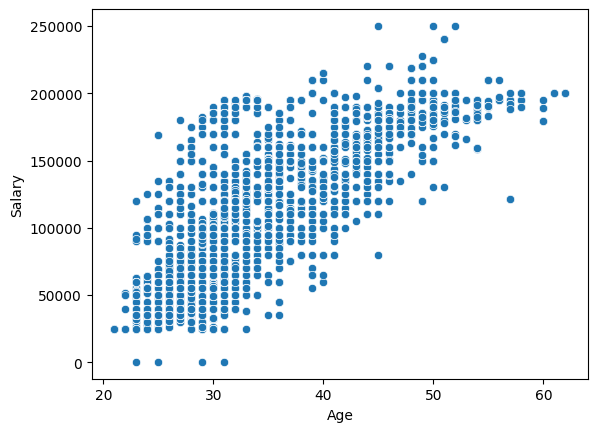

In [12]:
# plot the data
import seaborn as sns
sns.scatterplot(data=data, x='Age', y='Salary')

In [13]:
linearModel = LinearRegression()
linearModel.fit(x, y)

LinearRegression()

In [14]:
# Try to predict the salary
new_age = pd.DataFrame([35])
new_age

,0
0,35


In [15]:
# prediction
predicted_salary = linearModel.predict(new_age)
print("Predicted salary:", predicted_salary)

Predicted salary: [122278.37510104]


/home/tilak/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Training and testing data for evaluation
training, testing data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

In [18]:
xTrain

,Age
470,30.0
6015,36.0
5027,24.0
531,29.0
835,24.0
...,...
1236,62.0
3159,23.0
1627,54.0
4790,26.0


In [19]:
xTest

,Age
788,31.0
421,33.0
4940,28.0
933,30.0
5419,29.0
...,...
347,45.0
5714,32.0
4690,32.0
5554,39.0


In [20]:
yTrain

470     145000.0
6015    155000.0
5027     30000.0
531     180000.0
835      92000.0
          ...   
1236    200000.0
3159     50000.0
1627    195000.0
4790     31000.0
1912    115000.0
Name: Salary, Length: 5358, dtype: float64

In [21]:
yTest

788     195000.0
421     190000.0
4940    105000.0
933     185000.0
5419     60000.0
          ...   
347     180000.0
5714    120000.0
4690    100000.0
5554    200000.0
2422     55538.0
Name: Salary, Length: 1340, dtype: float64

In [22]:
linearModel = LinearRegression()
linearModel.fit(xTrain, yTrain)

LinearRegression()

In [23]:
# Now predict the value of y
yPredict = linearModel.predict(xTest)
print(yPredict)

[101796.56635832 111918.73839043  86613.30831016 ... 106857.65237437
 142285.25448674  66368.96424595]


In [24]:
# Now check the accuracy of the model
from sklearn.metrics import r2_score
r2_score(yTest, yPredict)
# see the accuracy of the model


0.5463982387960687

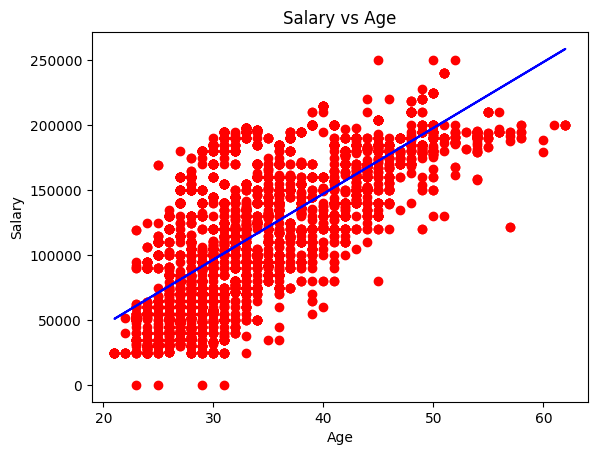

In [25]:
# now plot the model
import matplotlib.pyplot as plt
plt.scatter(xTrain, yTrain, color='red')
plt.plot(xTrain, linearModel.predict(xTrain), color='blue')
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()